### Implements algorithm 1 in the parti-game [paper](https://link.springer.com/content/pdf/10.1007/BF00993591.pdf)

Learn a controller from a start region to a goal region on a continuous space; Four increasingly effective algorithms to partition discrete state spaces. Algorithm 1 and 2 are non-learning; 3 and 4 learn, hence explore, the world while planning a route to the goal. Here, I implement algorithm 1

In [2]:
import sys
import numpy as np
from os.path import abspath, join
sys.path.append(abspath(join('../..')))

from LevelSetPy.Grids import *
import matplotlib.pyplot as plt
from LevelSetPy.Utilities import *
from LevelSetPy.BoundaryCondition import *
from LevelSetPy.Visualization import *
from math import pi
from LevelSetPy.InitialConditions import shapeCylinder
%matplotlib inline

### A Basic 2-D Grid and a signed distance function cylinder

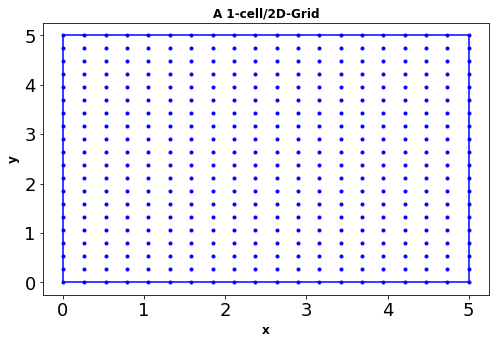

In [3]:
from math import pi
gridMin = np.array([[0,0]])
gridMax = np.array([[5, 5]])
N = 20 *np.ones((2,1)).astype(np.int64)
g = createGrid(gridMin, gridMax, N, low_mem=False, process=True)


viz = Visualizer(winsize=(8, 5), savedict={'save': False})
viz.visGrid([g], g.dim, title='Simple 2D Grid')

### A 3-D Grid and a signed distance function cylinder

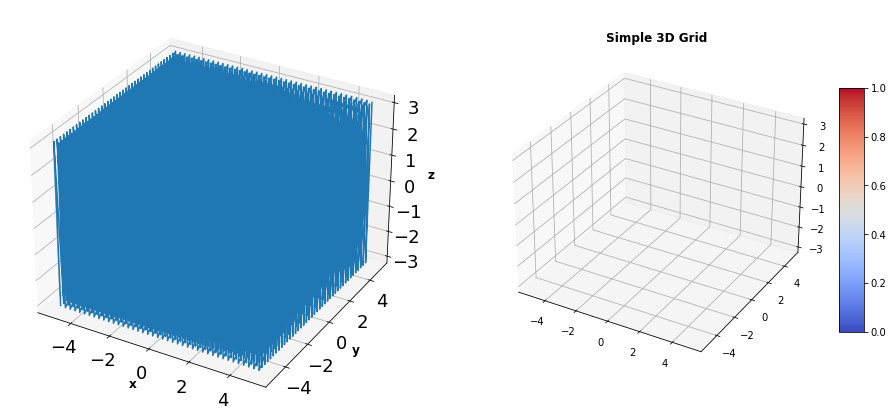

In [4]:

grid_min = expand(np.array((-5, -5, -pi)), ax = 1); # Lower corner of computation domain
grid_max = expand(np.array((5, 5, pi)), ax = 1);   # Upper corner of computation domain
N = 41*ones(3, 1).astype(np.int64)
pdDims = 3;               # 3rd dimension is periodic
g = createGrid(grid_min, grid_max, N, pdDims);

data0 = shapeCylinder(g, 3, zeros(len(N), 1), radius=1)

viz = Visualizer(winsize=(16, 9), savedict={'save': False})
viz.visGrid(g, g.dim, title='Simple 3D Grid')

### A 4-D Grid

Split into two; and project the split grids back to 2D 

In [5]:
# this is same as sepGrid_test
num_points=30
gridIn=expand(np.array((0, 1, 0, 1)), 1)
gridOut =expand(np.array((1, 2, 1, 2)), 1)
N = num_points*ones(4,1).astype(np.int64)
g = createGrid(gridIn, gridOut, N, process=False, low_mem=True);

# print(f'len(g.xs), g.xs[0].shape {len(g.xs), g.xs[0].shape} g.N {g.N.shape}')
dims = [[0, 2], [1, 3]]

gs, ds = sepGrid(g, dims)

# Visualize
viz = Visualizer(winsize=(8, 6), savedict={'save': False})
viz.visGrid(gs, dim= len(gs), dims=dims, title=f'A {len(gs)}-cell Grid Example')

NameError: name 'sepGrid' is not defined

### A 4-D Grid Split into 4 subgrids; 

+ re-projected the split grids back to 2D

In [11]:
# 4 subcells grid
num_points=30
gridIn=expand(np.array((0, 1, 0, 1)), 1)
gridOut =expand(np.array((1, 2, 1, 2)), 1)
N = num_points*ones(4,1).astype(np.int64)
g = createGrid(gridIn, gridOut, N, process=True, low_mem=True);

# print(f'len(g.xs), g.xs[0].shape {len(g.xs), g.xs[0].shape} g.N {g.N.shape}')
dims = [[0, 2], [1, 2],  [1, 3], [0, 1]]

gs, dat = sepGrid(g, dims);

viz = Visualizer(winsize=(8, 5), savedict={'save': False})

viz.visGrid(gs, len(gs), title=f'A {len(gs)}-cell Grid Example', dims=dims)

ValueError: Cross index must be 1 dimensional

### An Eight-Grid Cell

+ Be careful with the number of points here 
+ as too many points can cause memory issues

In [6]:
## Cells Division Example | Lekan August 05

gridIn= expand(np.array((0, 1, 0, 1, 1, 2, 1, 2)), 1)
gridOut =expand(np.array((1, 2, 1, 2, 2, 3, 2, 3)), 1)

num_points = 10
N = num_points*ones(8,1).astype(np.int64)

g = createGrid(gridIn, gridOut, N, process=True);

dims = [[0, 2], [1, 2],  [1, 3], [0, 1]]
gs, data = sepGrid(g, dims);
len(gs)
viz = Visualizer(winsize=(8, 5))
viz.visGrid(gs, len(gs), title=f'A {len(N)}-sub-grid Example', dims=dims)

Grid dimension > 5, may be dangerously large


### Making cell partitions in grids

In [7]:
# A 2D grid
g = createGrid(np.array([[0, 0]]).T, np.array([[1, 1]]).T, np.array([[101, 101]]).T);

bounds = [[0, 0.5, 1], [0, 0.25, 0.75, 1]]
padding = np.array([[0, 0]]).T;
gs = splitGrid_sameDim(g, bounds, padding);

viz = Visualizer(winsize=(8, 5))
viz.visGrid(gs, gs[0].dim, title=f'A {len(gs)}-cell Grid Example')

### A 3D grid with subcells

In [8]:
# A 3D grid
gmin = zeros(3,1); gmax = ones(3,1); N = 75*ones(3,1)
bounds = [[0, 0.33, 0.5, 0.8, 1], [0, 0.5, 0.75, 1], np.linspace(0, 1, 5).tolist()]
padding = zeros(3,1)
g = createGrid(gmin, gmax, N);
gs = splitGrid_sameDim(g, bounds, padding);

In [9]:
viz = Visualizer(winsize=(16, 9))

ax = plt.axes(projection='3d')
for i in range(len(gs)):
    g = gs[i]
    #viz.visGrid(gs[i], gs[i].dim, title=f'A {len(gs)}-cell {len(gs)}-Grid Example')
    ax.plot3D(g.xs[0].flatten(), g.xs[1].flatten(), g.xs[2].flatten())
ax.set_title(f'A {len(gs)}-cell within a {gs[0].dim}-Grid Example')
plt.show()

In [49]:
__author__ 		= "Lekan Molu"
__copyright__ 	= "2021, Decomposing Level Sets of PDEs"
__credits__  	= "Sylvia Herbert, Ian Abraham"
__license__ 	= "Lekan License"
__maintainer__ 	= "Lekan Molu"
__email__ 		= "patlekno@icloud.com"
__status__ 		= "Completed"

import time
import numpy as np.n
from os.path import join
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
from Utilities.matlab_utils import *
from Grids.create_grid import createGrid
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from Visualization.mesh_implicit import implicit_mesh



class InteractiveVisualizer(object):
    def __init__(self, params={}, num_plots=2, rows=None, cols=None):
        """
            Interactive Plotter Class that allows us to visualize value function slices
            and trajectories as we optimize them in real-time.
        """

        assert num_plots is not None, 'Number of Plots cannot be None.'

        if rows is None:
            rows = int(np.floor(np.sqrt(num_plots)))
        if cols is None:
            cols = int(np.ceil(float(num_plots)/rows))

        assert num_plots <= rows*cols, 'Too many plots to put into gridspec.'

        self.params 	= params
        self._labelsize = params.labelsize
        self._init      = False
        self.value      = params.value if isfield(params, 'value') else None
        self._fontdict  = params.fontdict
        self.pause_time = params.pause_time
        self.savedict   = params.savedict
        # self.num_plots   = params.num_plots

        plt.ion()
        self._fig = plt.figure(figsize=params.winsize)
        self._gs_plots = gridspec.GridSpec(rows, cols, self._fig)
        self._ax_arr = [plt.subplot(self._gs_plots[i], projection='3d') for i in range(num_plots)]
        self._lims = [None for i in range(num_plots)]
        self._plots = [[] for i in range(num_plots)]
        # self._ax.legend(loc='best', fontdict = self._fontdict)

        for ax in self._ax_arr:
            ax.tick_params(pad=0)
            ax.locator_params(nbins=5)
            for item in (ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()):
                item.set_fontsize(self._fontdict.fontsize)
                item.set_fontweight(self._fontdict.fontweight)

        if self.params.init_conditions or self.value:
            assert isinstance(value, np.ndarray), "value function must be an ndarray."
            self.init_projections(value.ndim)
        else:
            self.init_valueset(params, 0)

        self._fig.canvas.draw()
        self._fig.canvas.flush_events()

    def init_projections(self, value_dims):
        """
        Initialize plots based off the length of the data array.
        """
        # value_dims = value_dims
        # Show me the value function
        # self._ax.set_xlabel('$\\xi$', fontdict=self._fontdict)
        # self._ax.set_ylabel('$\\dot{\\xi}$', fontdict=self._fontdict)

        ax_idx = 0
        if self.params.init_projections:
            if value_dims==2:
                self._ax_arr[ax_idx] = plt.subplot(self._gs_plots[0])
                self._ax_arr[ax_idx].plot(self.value[0], self.value[1], 'b*') #,markersize=15,linewidth=3, label='Target')
            elif value_dims==3:
                self._ax_arr[ax_idx] = plt.subplot(self._gs_plots[0], projection='3d')
                self._ax_arr[ax_idx].plot(self.value[0], self.value[1], self.value[2], 'b*') #,markersize=15,linewidth=3, label='Target')

            self._ax_arr[ax_idx].set_title('Initial Projections', fontdict=self._fontdict)
            ax_idx += 1
        else:
            value_data = self.params.value_data
            if isfield(self.params, 'grid_bundle') and isbundle(self.params.grid_bundle, self.params):
                g = self.params.grid_bundle
            else: # create the grid
                N = np.asarray(size(value_data)).T
                g = createGrid(np.ones(value_data.ndim, 1), N, N)
            if g.dim != value_data.ndim and g.dim+1 != value_data.ndim:
                raise ValueError('Grid dimension is inconsistent with data dimension!')
            if g.dim == value_data.ndim:
                self.init_valueset(g, value_data, ax_idx)

            self._ax_arr[ax_idx].set_title('Initial Value Set', fontdict=self._fontdict)

        self._ax_arr[ax_idx].xaxis.set_tick_params(labelsize=self._labelsize)
        self._ax_arr[ax_idx].yaxis.set_tick_params(labelsize=self._labelsize)

        self._ax_arr[ax_idx].grid('on')
        self._ax_arr[ax_idx].legend(loc='best', fontdict = self._fontdict)
        self._init = True

    def init_valueset(self, params, ax_idx=0):
        g 		= 	params.grid_bundle
        data 	= 	params.value_data

        color = iter(plt.cm.viridis_r(np.linspace(0, 1, len(self._ax_arr))))

        if g.dim<2:
            self._ax_arr[ax_idx].plot(g.xs[0],  data, linestyle='-', color=next(color))
            self._ax_arr[ax_idx].plot(g.xs[0],  np.zeros(size(g.xs[0])), linestyle=':', color='k')
        elif g.dim==2:
            self._ax_arr[ax_idx] = plt.subplot(self._gs_plots[ax_idx], projection='3d')
            self._ax_arr[ax_idx].contourf(g.xs[0], g.xs[1], self.value, levels=self.params.level, colors=next(color)) #,markersize=15,linewidth=3, label='Target')
            self._ax_arr[ax_idx].set_xlabel('X', fontdict=self.fontdict)
            self._ax_arr[ax_idx].set_ylabel('Y', fontdict=self.fontdict)
            self._ax_arr[ax_idx].set_zlabel('Z', fontdict=self.fontdict)
            self._ax_arr[ax_idx].set_title(f'Initial {self.params.level}-Value Set',fontdict = self._fontdict)
        elif g.dim == 3:
            spacing = tuple(g.dx.flatten().tolist())
            mesh = implicit_mesh(data, level=self.params.level, spacing=spacing,  edge_color='k', face_color='r')
            self.show_3d(g, mesh, ax_idx, color, spacing)
            self._ax_arr[ax_idx].set_xlabel("X") #, fontdict = self._fontdict)
            self._ax_arr[ax_idx].set_ylabel("Y") #, fontdict = self._fontdict)
            self._ax_arr[ax_idx].set_zlabel("Z") #, fontdict = self._fontdict)
            # self._ax_arr[ax_idx].set_title(f'Initial {self.params.level}-Value Set',fontdict = self._fontdict)
            self.set_title(ax_idx, f'Initial {self.params.level}-Value Set')
        elif g.dim == 4:
            # This is useful for the temporal-axis and 3 Cartesian Coordinates
            'Take 6 slice snapshots and show me the 3D projections'
            N=6
            for slice_idx in range(N):
                self.ax_arr[slice_idx] = plt.subplot(self._gs_plots[slice_idx], projection='3d')
                xs = g.min[g.dim] + i/(N+1) * (g.max[g.dim] - g.min[g.dim])
                dim = [0, 0, 0, 1]
                g3D, mesh3D = proj(g, data, dim, xs)
                self.show_3d(g3D, mesh3D, ax_idx, color, spacing)

                self.set_title(ax_idx, f"Projected Slice {g.dim} of Initial Value Function Snapshot {slice_idx}.")
                ax_idx += 1

        if self.savedict.save:
            self._fig.savefig(join(self.savedict.savepath,self.savedict.savename),
                                bbox_inches='tight',facecolor='None')

    def show_3d(self, g, mesh, ax_idx, color, spacing):
        self._ax_arr[ax_idx] = plt.subplot(self._gs_plots[ax_idx], projection='3d')
        self._ax_arr[ax_idx].plot3D(g.xs[0].flatten(), g.xs[1].flatten(), g.xs[2].flatten(), color=next(color))
        if isinstance(mesh, list):
            for m in mesh:
                m = implicit_mesh(m, level=self.params.level, spacing=spacing,  edge_color='k', face_color='r')
                self._ax_arr[ax_idx].add_collection3d(m)
        else:
            self._ax_arr[ax_idx].add_collection3d(mesh)
            

    def set_title(self, i, title):
            self._ax_arr[i].set_title(title)
            self._ax_arr[i].title.set_fontsize(self._fontdict.fontsize)
            self._ax_arr[i].title.set_fontweight(self._fontdict.fontweight)

    def add_legend(self, linestyle, marker, color, label):
        self._ax_legend.plot([], [], linestyle=linestyle, marker=marker,
                color=color, label=label)
        self._ax_legend.legend(ncol=2, mode='expand', fontsize=10)

    def draw(self):
        for plots in self._plots:
            self._ax.draw_artist(each_plot)

        self._fig.canvas.draw()
        self._fig.canvas.flush_events()
